In [1]:
import pandas as pd
import seaborn as sns
import plotly.offline as py
import seaborn as sns
import matplotlib.pyplot as pl
import warnings
warnings.filterwarnings('ignore')

In [2]:
matches=pd.read_csv('WorldCupMatches.csv')
players=pd.read_csv('WorldCupPlayers.csv')
cups=pd.read_csv('WorldCups.csv')

In [3]:
matches.head(3)

Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                   3.0                   0.0   
1                    18346.0                   2.0                   0.0   
2                    24059.0                   2.0                   0.0   

                  Referee               Assistant 1            Assistant 2  \
0  LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)    REGO Gilberto (BRA)   
1       MACIAS Jose (ARG)  MATEUCCI Francisco (URU)  WARNKEN Alberto (CHI)   
2     TEJADA Anibal (URU)   VALLARINO Ricardo (URU)    BALWAY Thomas (FRA)   

   RoundID  MatchID Home Team Initials Away Team Initials  
0    201.0   1096.0                FRA                MEX  
1    201.0   1090.0                USA                BEL  
2    201.0   1093.0                YUG                BRA

In [4]:
players.head(3)

RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'

In [5]:
cups.head(3)

Year  Country   Winner      Runners-Up    Third      Fourth  GoalsScored  \
0  1930  Uruguay  Uruguay       Argentina      USA  Yugoslavia           70   
1  1934    Italy    Italy  Czechoslovakia  Germany     Austria           70   
2  1938   France    Italy         Hungary   Brazil      Sweden           84   

   QualifiedTeams  MatchesPlayed Attendance  
0              13             18    590.549  
1              16             17    363.000  
2              15             18    375.700

In [6]:
matches_temp=matches[matches['Year'].notnull()]

In [7]:
matches_temp['Year']=matches_temp['Year'].astype(int)
matches_temp=matches_temp.groupby('Year')['Attendance'].sum().reset_index()

In [8]:
matches_temp

Year  Attendance
0   1930    590549.0
1   1934    363000.0
2   1938    375700.0
3   1950   1045246.0
4   1954    768607.0
5   1958    819810.0
6   1962    893172.0
7   1966   1563135.0
8   1970   1603975.0
9   1974   1865753.0
10  1978   1545791.0
11  1982   2109723.0
12  1986   2394031.0
13  1990   2516215.0
14  1994   3587538.0
15  1998   2785100.0
16  2002   2705197.0
17  2006   3359439.0
18  2010   3178856.0
19  2014   4319243.0

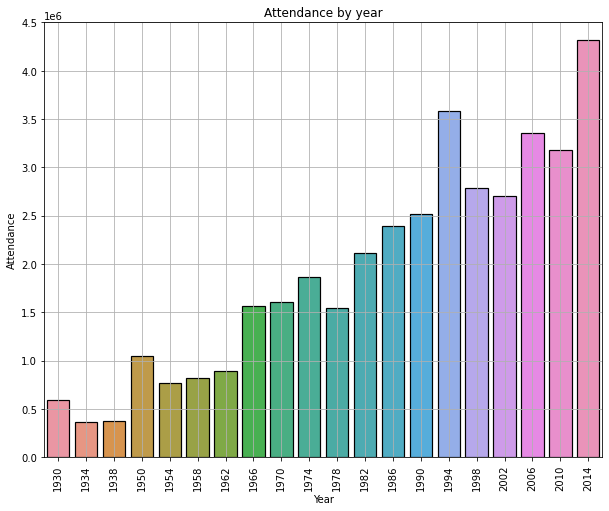

In [9]:
pl.figure(figsize=(10,8))
sns.barplot(matches_temp['Year'],matches_temp['Attendance'],
           linewidth=1.2,edgecolor='k')
pl.xticks(rotation=90)
pl.ylim(0,4500000)
pl.grid()
pl.title('Attendance by year')
pl.show()

2014 had tha maximum attandees followed by 1994

In [10]:
matches_notnull=matches[matches['Year'].notnull()].copy()

In [11]:
matches_temp=matches_notnull.groupby('Year')['Attendance'].mean().reset_index()

In [12]:
matches_temp['Year']=matches_temp['Year'].astype(int)

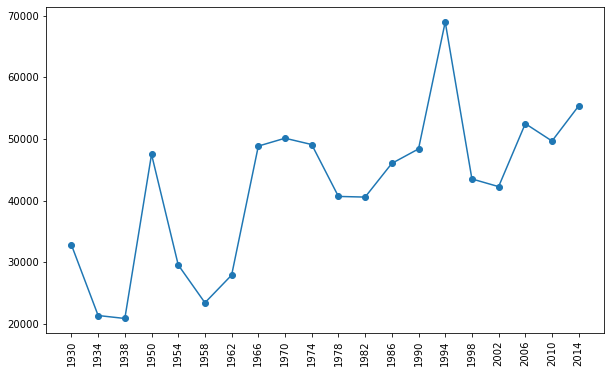

In [13]:
pl.figure(figsize=(10,6))
pl.plot(matches_temp['Attendance'],marker='o')
pl.xticks(range(len(matches_temp)),matches_temp['Year'],rotation=90)
pl.show()

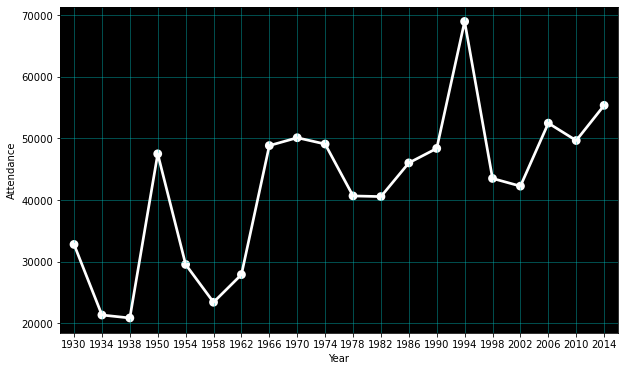

In [14]:
pl.figure(figsize=(10,6))
ax=sns.pointplot(matches_temp['Year'],matches_temp['Attendance'],color='w')
ax.set_facecolor('k')
pl.grid(color='c',alpha=0.5)
pl.show()

In [15]:
cups

Year       Country      Winner      Runners-Up        Third  \
0   1930       Uruguay     Uruguay       Argentina          USA   
1   1934         Italy       Italy  Czechoslovakia      Germany   
2   1938        France       Italy         Hungary       Brazil   
3   1950        Brazil     Uruguay          Brazil       Sweden   
4   1954   Switzerland  Germany FR         Hungary      Austria   
5   1958        Sweden      Brazil          Sweden       France   
6   1962         Chile      Brazil  Czechoslovakia        Chile   
7   1966       England     England      Germany FR     Portugal   
8   1970        Mexico      Brazil           Italy   Germany FR   
9   1974       Germany  Germany FR     Netherlands       Poland   
10  1978     Argentina   Argentina     Netherlands       Brazil   
11  1982         Spain       Italy      Germany FR       Poland   
12  1986        Mexico   Argentina      Germany FR       France   
13  1990         Italy  Germany FR       Argentina        Italy   
14  1994           USA      Brazil           Italy       Sweden   
15  1998        France      France          Brazil      Croatia   
16  2002   Korea/Japan      Brazil         Germany       Turkey   
17  2006       Germany       Italy          France      Germany   
18  2010  South Africa       Spain     Netherlands      Germany   
19  2014        Brazil     Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0       Yugoslavia           70              13             18    590.549  
1          Austria           70              16             17    363.000  
2           Sweden           84              15             18    375.700  
3            Spain           88              13             22  1.045.246  
4          Uruguay          140              16             26    768.607  
5       Germany FR          126              16             35    819.810  
6       Yugoslavia           89              16             32    893.172  
7     Soviet Union           89              16             32  1.563.135  
8          Uruguay           95              16             32  1.603.975  
9           Brazil           97              16             38  1.865.753  
10           Italy          102              16             38  1.545.791  
11          France          146              24             52  2.109.723  
12         Belgium          132              24             52  2.394.031  
13         England          115              24             52  2.516.215  
14        Bulgaria          141              24             52  3.587.538  
15     Netherlands          171              32             64  2.785.100  
16  Korea Republic          161              32             64  2.705.197  
17        Portugal          147              32             64  3.359.439  
18         Uruguay          145              32             64  3.178.856  
19          Brazil          171              32             64  3.386.810

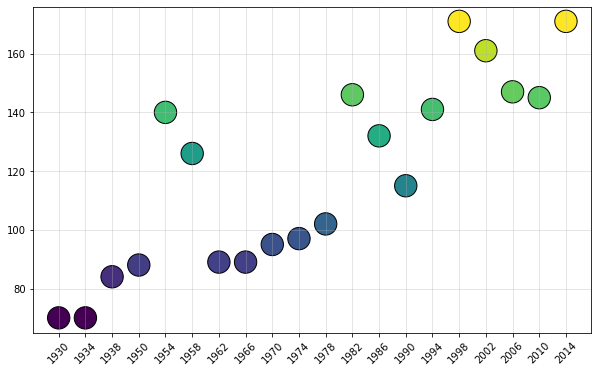

In [16]:
cups_t=cups.copy()
cups_t['Year']=cups_t['Year'].astype(str)
pl.figure(figsize=(10,6))
ax=pl.scatter(data=cups_t,x='Year',y='GoalsScored',c=cups_t['GoalsScored'],s=500,
          edgecolor='k',linewidth=1,)
pl.xticks(cups_t['Year'].unique())
pl.xticks(rotation=45)
pl.grid(alpha=0.4)

In [17]:
cups_t['Year'].unique()

array(['1930', '1934', '1938', '1950', '1954', '1958', '1962', '1966',
       '1970', '1974', '1978', '1982', '1986', '1990', '1994', '1998',
       '2002', '2006', '2010', '2014'], dtype=object)

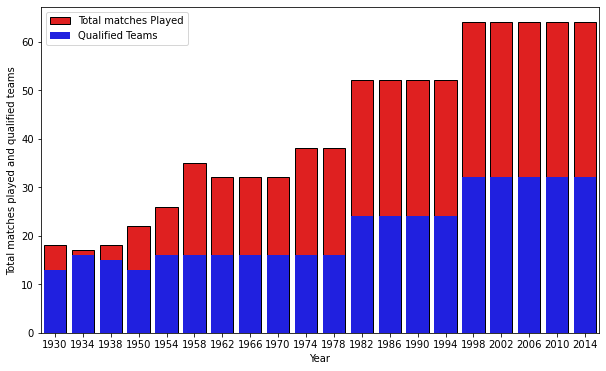

In [18]:
pl.figure(figsize=(10,6))
sns.barplot(data=cups_t,x='Year',y='MatchesPlayed',color='r',edgecolor='k',label='Total matches Played')
sns.barplot(data=cups_t,x='Year',y='QualifiedTeams',color='b',label='Qualified Teams')
pl.legend()
pl.ylabel('Total matches played and qualified teams')
pl.show()

In [19]:
matches.shape

(4572, 20)

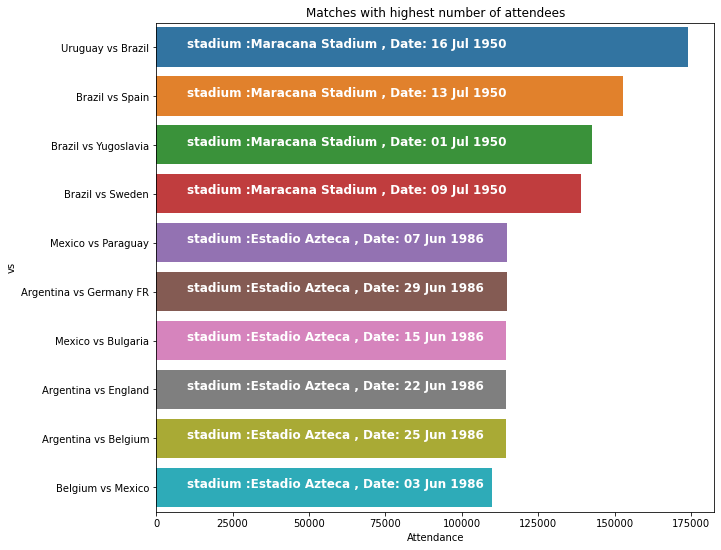

In [20]:
h_att=matches.sort_values('Attendance',ascending=False)[:10]
h_att=h_att[['Year', 'Datetime','Stadium', 'City', 'Home Team Name',
              'Home Team Goals', 'Away Team Goals', 'Away Team Name', 'Attendance', 'MatchID']]
h_att['Stadium']=h_att['Stadium'].replace('Maracan� - Est�dio Jornalista M�rio Filho','Maracana Stadium')
h_att['Datetime']=h_att['Datetime'].str.split('-').str[0]
h_att['vs']=h_att['Home Team Name']+' vs '+h_att['Away Team Name']

pl.figure(figsize=(10,9))
ax=sns.barplot(y=h_att['vs'],x=h_att['Attendance'])
pl.title('Matches with highest number of attendees')
for i,j in enumerate('stadium :'+h_att['Stadium']+' , Date: '+h_att['Datetime']):
    ax.text(10000,i,j,fontsize=12,color='w',weight='bold')

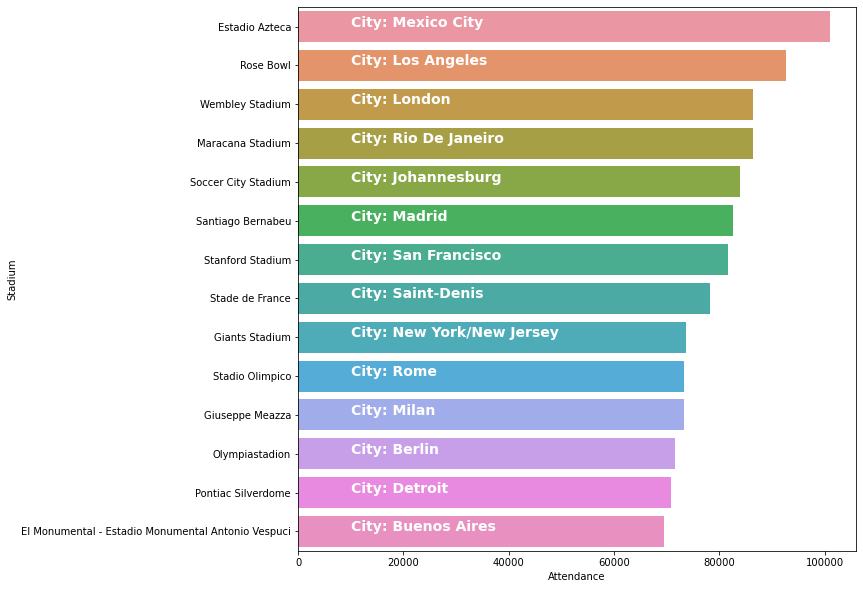

Stadium             City     Attendance
32        Estadio Azteca     Mexico City   100923.684211
136            Rose Bowl     Los Angeles    92600.875000
178      Wembley Stadium          London    86448.222222
98      Maracana Stadium  Rio De Janeiro    86417.333333
150  Soccer City Stadium    Johannesburg    83857.375000
..                   ...              ...            ...
64     Giorgio Ascarelli          Naples     8000.000000
75         Independencia  Belo Horizonte     7590.333333
48            Eucaliptos    Porto Alegre     7329.000000
57           Fort Carree         Antibes     7000.000000
125              Pocitos      Montevideo     3496.500000

[182 rows x 3 columns]

In [21]:
temp=matches.copy()
temp=temp[temp['Year'].notnull()]
temp['Year']=temp['Year'].astype(int)
temp['Stadium']=temp['Stadium'].str.replace('Maracan� - Est�dio Jornalista M�rio Filho',
                                            'Maracana Stadium')
temp['Stadium']=temp['Stadium'].str.replace('Estadio do Maracana','Maracana Stadium')
std=temp.groupby(['Stadium','City'])['Attendance'].mean().reset_index().sort_values('Attendance',ascending=False)
pl.figure(figsize=(10,10))
ax=sns.barplot(y=std['Stadium'][:14],
               x=std['Attendance'][:14])
for i,j in enumerate('City: '+std['City'][:14]):
    ax.text(10000,i,j,fontsize=14,color='w',weight='bold')
pl.show()

std

In [22]:
temp.groupby(['Stadium','City'])['Attendance'].mean()

Stadium           City     
Arena Amazonia    Manaus       40056.750000
Arena Fonte Nova  Salvador     50385.000000
Arena Pantanal    Cuiaba       39679.250000
Arena Pernambuco  Recife       41020.666667
Arena da Baixada  Curitiba     39247.750000
                                   ...     
Wankdorf Stadium  Berne        38900.000000
Wembley Stadium   London       86448.222222
Westfalenstadion  Dortmund     46925.000000
White City        London       45662.000000
Zentralstadion    Leipzig      42000.000000
Name: Attendance, Length: 182, dtype: float64

City  Counts
0      Mexico City       23
1   Rio De Janeiro       18
2       Montevideo       18
3      Guadalajara       17
4     Johannesburg       15
5        Sao Paulo       14
6     Buenos Aires       12
7             Leon       11
8           Munich       11
9   Belo Horizonte       11
10          London       10
11   Gelsenkirchen       10
12  Frankfurt/Main       10
13        Brasilia       10
14       Stuttgart       10

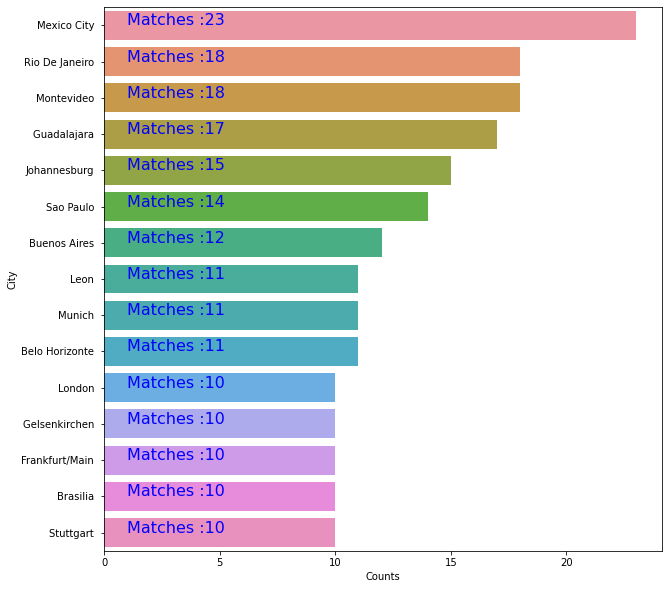

In [23]:
pl.figure(figsize=(10,10))
temp=matches['City'].value_counts().reset_index()[:15]
temp.columns=['City','Counts']
ax=sns.barplot(y=temp['City'],x=temp['Counts'])
for i,j in enumerate('Matches :'+temp['Counts'].astype(str)):
    ax.text(1,i,j,fontsize=16,color='b')
temp

City    Attendance
79           Mexico City   93806.521739
67           Los Angeles   92600.875000
112       Rio De Janeiro   86417.333333
66                London   82369.600000
119        San Francisco   81737.333333
115          Saint-Denis   78222.222222
91   New York/New Jersey   73689.714286
7                 Berlin   71500.000000
30               Detroit   70899.500000
55          Johannesburg   69580.133333
16              Brasilia   68268.500000
148             Yokohama   66579.750000
121    Santiago De Chile   66377.100000
20             Cape Town   63417.500000
21               Chicago   62545.000000
17          Buenos Aires   62482.166667
32                Durban   62090.142857
98               Orlando   61265.800000
70                Madrid   60584.142857
85                Munich   59590.909091

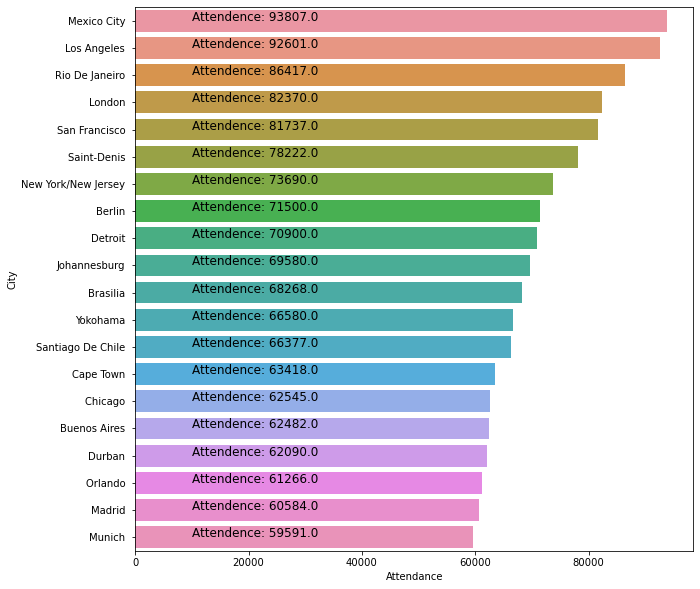

In [24]:
pl.figure(figsize=(10,10))
temp=matches.groupby('City')['Attendance'].mean().reset_index().sort_values('Attendance',ascending=False)[:20]
ax=sns.barplot(temp['Attendance'],temp['City'])

for i,j in enumerate('Attendence: '+ round(temp['Attendance']).astype(str)):
    ax.text(10000,i,j,fontsize=12,color='black')
temp

In [25]:
cups['Winner']=cups['Winner'].replace('Germany FR','Germany')
cups['Runners-Up']=cups['Runners-Up'].replace('Germany FR','Germany')

In [26]:
from collections import defaultdict
cups_val=defaultdict(list)
for i,j in zip(cups['Year'],cups['Winner']):
    cups_val[j].append(i)
    
cups_val

defaultdict(list,
            {'Uruguay': [1930, 1950],
             'Italy': [1934, 1938, 1982, 2006],
             'Germany': [1954, 1974, 1990, 2014],
             'Brazil': [1958, 1962, 1970, 1994, 2002],
             'England': [1966],
             'Argentina': [1978, 1986],
             'France': [1998],
             'Spain': [2010]})

In [27]:
temp=cups.groupby('Winner')['Year'].count().sort_values(ascending=False).reset_index()


temp['Years']=[0,0,0,0,0,0,0,0]
temp


Winner  Year  Years
0     Brazil     5      0
1      Italy     4      0
2    Germany     4      0
3    Uruguay     2      0
4  Argentina     2      0
5      Spain     1      0
6     France     1      0
7    England     1      0

In [28]:
for i,j in temp.iterrows():
    tm=j[0]
    lists=np.array(cups_val[tm]).astype(str)
    lists=' , '.join(lists)
    
    temp.iloc[i,2]=lists
temp

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Winner  Year                             Years
0     Brazil     5  1958 , 1962 , 1970 , 1994 , 2002
1      Italy     4         1934 , 1938 , 1982 , 2006
2    Germany     4         1954 , 1974 , 1990 , 2014
3    Uruguay     2                       1930 , 1950
4  Argentina     2                       1978 , 1986
5      Spain     1                              2010
6     France     1                              1998
7    England     1                              1966

Text(0.5, 1.0, 'Teams that won the games with counts and years')

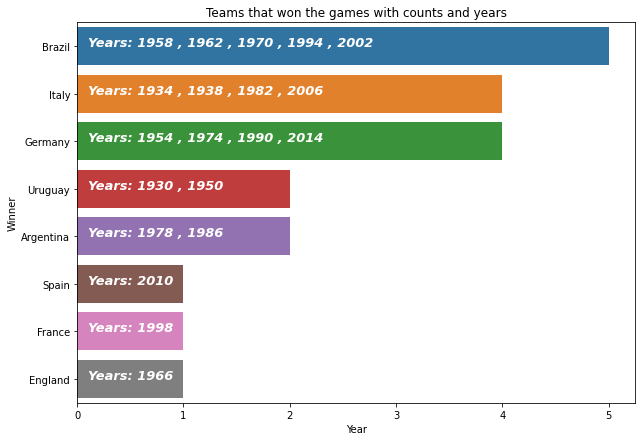

In [29]:
pl.figure(figsize=(10,7))
ax=sns.barplot(temp['Year'],temp['Winner'])
for i,j in enumerate('Years: '+temp['Years'].astype(str)):
    ax.text(0.1,i,j,fontsize=13,c='w',weight='bold',style='italic')
pl.title("Teams that won the games with counts and years")

In [30]:
winners=cups['Winner'].value_counts().reset_index()
runnerups=cups['Runners-Up'].value_counts().reset_index()
winners.columns=['Country','Counts']
runnerups.columns=['Country','Counts']
winners['Type']='Winners'
runnerups['Type']='Runner- ups'
tot=pd.concat([winners,runnerups],axis=0)
tot

Country  Counts         Type
0          Brazil       5      Winners
1           Italy       4      Winners
2         Germany       4      Winners
3       Argentina       2      Winners
4         Uruguay       2      Winners
5         England       1      Winners
6          France       1      Winners
7           Spain       1      Winners
0         Germany       4  Runner- ups
1     Netherlands       3  Runner- ups
2       Argentina       3  Runner- ups
3          Brazil       2  Runner- ups
4  Czechoslovakia       2  Runner- ups
5           Italy       2  Runner- ups
6         Hungary       2  Runner- ups
7          Sweden       1  Runner- ups
8          France       1  Runner- ups

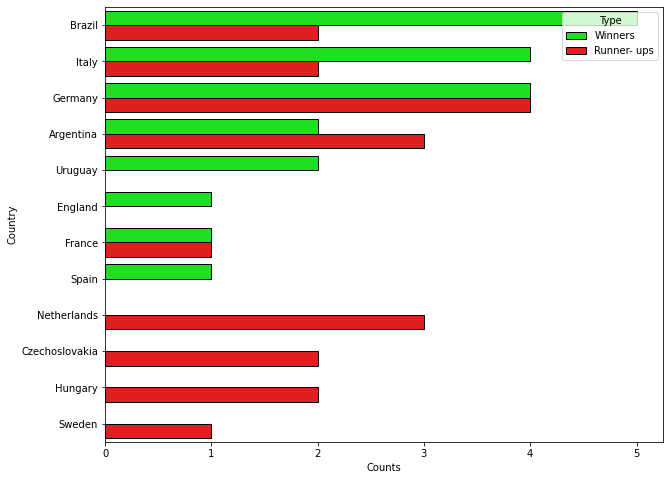

In [31]:
pl.figure(figsize=(10,8))
sns.barplot(data=tot,y='Country',x='Counts',hue='Type',
           palette=['lime','r'],linewidth=1,edgecolor='k')

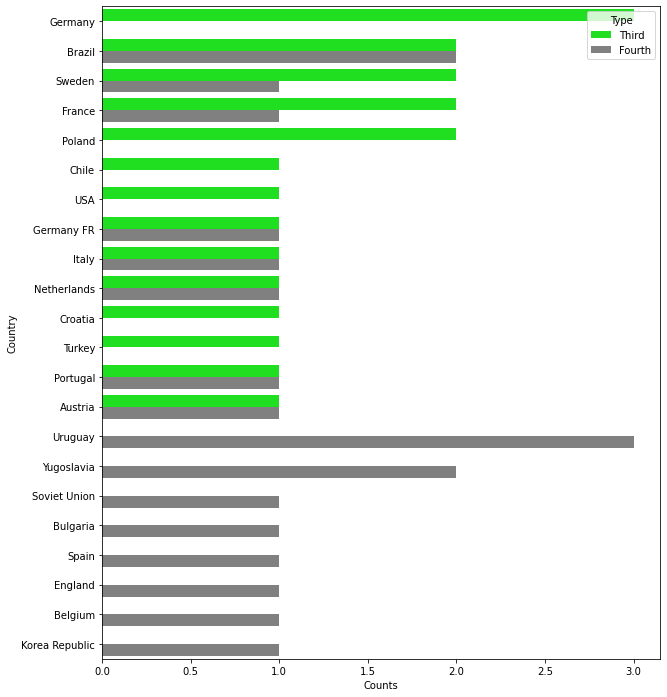

In [32]:
pl.figure(figsize=(10,12))
thirds=cups['Third'].value_counts().reset_index()
thirds.columns=['Country','Counts']
fourth=cups['Fourth'].value_counts().reset_index()
fourth.columns=['Country','Counts']
thirds['Type']='Third'
fourth['Type']='Fourth'
tot=pd.concat([thirds,fourth])

sns.barplot(data=tot,x='Counts',y='Country',hue='Type',palette=['lime','gray'])

In [33]:
matches

Year              Datetime    Stage         Stadium         City  \
0     1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1     1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2     1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3     1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4     1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    
...      ...                   ...      ...             ...          ...   
4567     NaN                   NaN      NaN             NaN          NaN   
4568     NaN                   NaN      NaN             NaN          NaN   
4569     NaN                   NaN      NaN             NaN          NaN   
4570     NaN                   NaN      NaN             NaN          NaN   
4571     NaN                   NaN      NaN             NaN          NaN   

     Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0            France              4.0              1.0         Mexico   
1               USA              3.0              0.0        Belgium   
2        Yugoslavia              2.0              1.0         Brazil   
3           Romania              3.0              1.0           Peru   
4         Argentina              1.0              0.0         France   
...             ...              ...              ...            ...   
4567            NaN              NaN              NaN            NaN   
4568            NaN              NaN              NaN            NaN   
4569            NaN              NaN              NaN            NaN   
4570            NaN              NaN              NaN            NaN   
4571            NaN              NaN              NaN            NaN   

     Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                        4444.0                   3.0                   0.0   
1                       18346.0                   2.0                   0.0   
2                       24059.0                   2.0                   0.0   
3                        2549.0                   1.0                   0.0   
4                       23409.0                   0.0                   0.0   
...             ...         ...                   ...                   ...   
4567            NaN         NaN                   NaN                   NaN   
4568            NaN         NaN                   NaN                   NaN   
4569            NaN         NaN                   NaN                   NaN   
4570            NaN         NaN                   NaN                   NaN   
4571            NaN         NaN                   NaN                   NaN   

                     Referee               Assistant 1  \
0     LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1          MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2        TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3      WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4        REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   
...                      ...                       ...   
4567                     NaN                       NaN   
4568                     NaN                       NaN   
4569                     NaN                       NaN   
4570                     NaN                       NaN   
4571                     NaN                       NaN   

                     Assistant 2  RoundID  MatchID Home Team Initials  \
0            REGO Gilberto (BRA)    201.0   1096.0                FRA   
1          WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2            BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3       MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4     RADULESCU Constantin (ROU)    201.0   1085.0                ARG   
...                          ...      ...      ...                ...   
4567                         NaN      NaN      NaN                NaN   


In [34]:
trace=cups.groupby('Country')['MatchesPlayed'].sum().reset_index().sort_values('MatchesPlayed',ascending=False)
trace

Country  MatchesPlayed
5        Germany            102
1         Brazil             86
8         Mexico             84
4         France             82
6          Italy             69
7    Korea/Japan             64
9   South Africa             64
10         Spain             52
13           USA             52
0      Argentina             38
11        Sweden             35
2          Chile             32
3        England             32
12   Switzerland             26
14       Uruguay             18

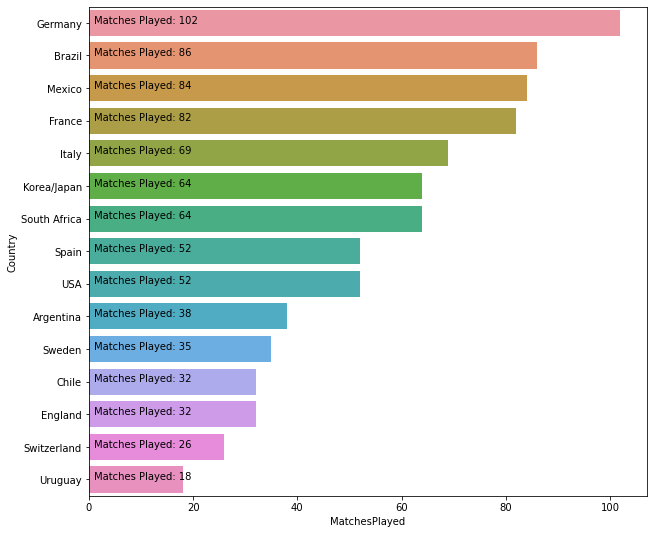

In [35]:
pl.figure(figsize=(10,9))
ax=sns.barplot(trace['MatchesPlayed'],trace['Country'])
for i,j in enumerate('Matches Played: '+trace['MatchesPlayed'].astype(str)):
    ax.text(1,i,j)

In [36]:
matches

Year              Datetime    Stage         Stadium         City  \
0     1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1     1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2     1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3     1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4     1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    
...      ...                   ...      ...             ...          ...   
4567     NaN                   NaN      NaN             NaN          NaN   
4568     NaN                   NaN      NaN             NaN          NaN   
4569     NaN                   NaN      NaN             NaN          NaN   
4570     NaN                   NaN      NaN             NaN          NaN   
4571     NaN                   NaN      NaN             NaN          NaN   

     Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0            France              4.0              1.0         Mexico   
1               USA              3.0              0.0        Belgium   
2        Yugoslavia              2.0              1.0         Brazil   
3           Romania              3.0              1.0           Peru   
4         Argentina              1.0              0.0         France   
...             ...              ...              ...            ...   
4567            NaN              NaN              NaN            NaN   
4568            NaN              NaN              NaN            NaN   
4569            NaN              NaN              NaN            NaN   
4570            NaN              NaN              NaN            NaN   
4571            NaN              NaN              NaN            NaN   

     Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                        4444.0                   3.0                   0.0   
1                       18346.0                   2.0                   0.0   
2                       24059.0                   2.0                   0.0   
3                        2549.0                   1.0                   0.0   
4                       23409.0                   0.0                   0.0   
...             ...         ...                   ...                   ...   
4567            NaN         NaN                   NaN                   NaN   
4568            NaN         NaN                   NaN                   NaN   
4569            NaN         NaN                   NaN                   NaN   
4570            NaN         NaN                   NaN                   NaN   
4571            NaN         NaN                   NaN                   NaN   

                     Referee               Assistant 1  \
0     LOMBARDI Domingo (URU)     CRISTOPHE Henry (BEL)   
1          MACIAS Jose (ARG)  MATEUCCI Francisco (URU)   
2        TEJADA Anibal (URU)   VALLARINO Ricardo (URU)   
3      WARNKEN Alberto (CHI)       LANGENUS Jean (BEL)   
4        REGO Gilberto (BRA)      SAUCEDO Ulises (BOL)   
...                      ...                       ...   
4567                     NaN                       NaN   
4568                     NaN                       NaN   
4569                     NaN                       NaN   
4570                     NaN                       NaN   
4571                     NaN                       NaN   

                     Assistant 2  RoundID  MatchID Home Team Initials  \
0            REGO Gilberto (BRA)    201.0   1096.0                FRA   
1          WARNKEN Alberto (CHI)    201.0   1090.0                USA   
2            BALWAY Thomas (FRA)    201.0   1093.0                YUG   
3       MATEUCCI Francisco (URU)    201.0   1098.0                ROU   
4     RADULESCU Constantin (ROU)    201.0   1085.0                ARG   
...                          ...      ...      ...                ...   
4567                         NaN      NaN      NaN                NaN   


<IPython.core.display.Javascript object>

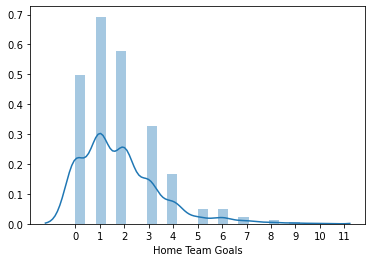

In [37]:
sns.distplot(matches['Home Team Goals'])
pl.xticks(np.arange(0,12,1))
pl.show()

<IPython.core.display.Javascript object>

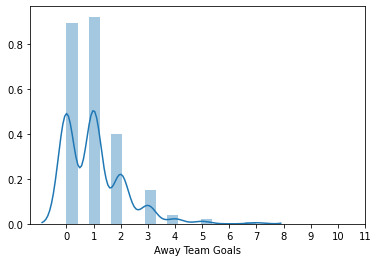

In [38]:
sns.distplot(matches['Away Team Goals'])
pl.xticks(np.arange(0,12,1))
pl.show()

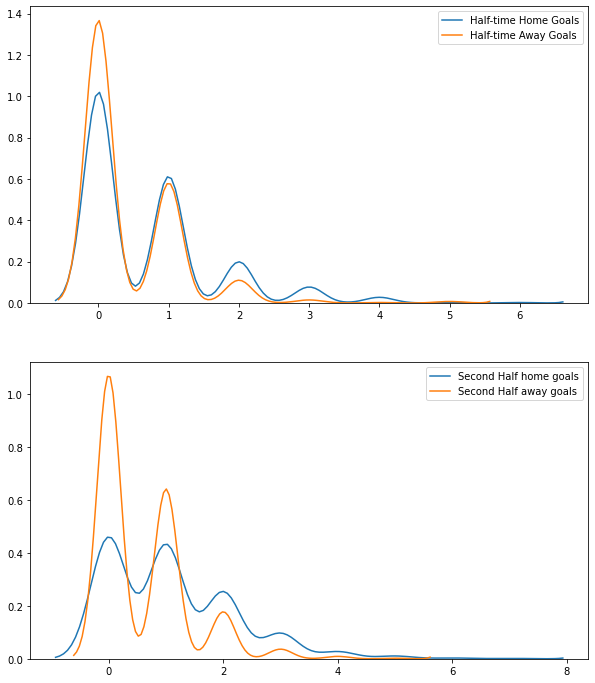

In [39]:
pl.figure(figsize=(10,12))
pl.subplot(211)
sns.kdeplot(matches['Half-time Home Goals'])
sns.kdeplot(matches['Half-time Away Goals'])
pl.subplot(212)
matches['Second Half home goals']=matches['Home Team Goals']-matches['Half-time Home Goals']
matches['Second Half away goals']=matches['Away Team Goals']-matches['Half-time Away Goals']
sns.kdeplot(matches['Second Half home goals'])
sns.kdeplot(matches['Second Half away goals'])

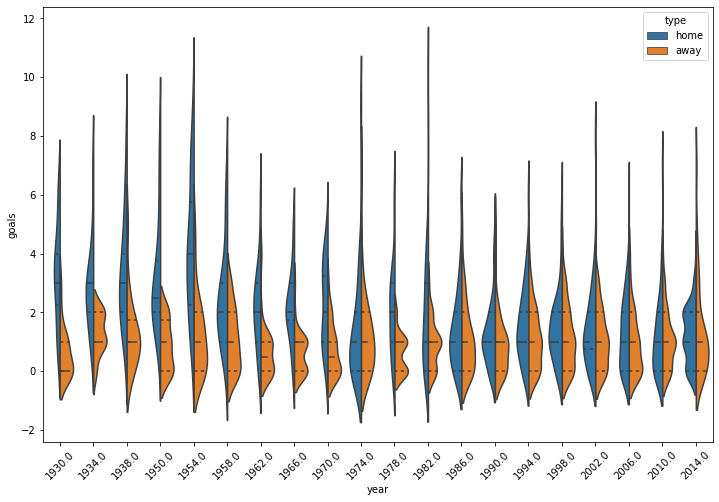

In [40]:
pl.figure(figsize=(12,8))
home=matches[['Year','Home Team Goals']]
aways=matches[['Year','Away Team Goals']]
home.columns=['year','goals']
aways.columns=['year','goals']
home['type']='home'
aways['type']='away'
tot=pd.concat([home,aways])
sns.violinplot(data=tot,y='goals',x='year',split=True,hue='type',
              inner='quart')
pl.xticks(rotation=45)
pl.show()

In [41]:
def labels(matches):
    if matches['Home Team Goals']>matches['Away Team Goals']:
        return 'home team win'
    if matches['Away Team Goals']>matches['Home Team Goals']:
        return 'away team win'
    if matches['Away Team Goals']==matches['Home Team Goals']:
        return 'draw'
matches['Outcome']=matches.apply(lambda matches: labels(matches),axis=1)

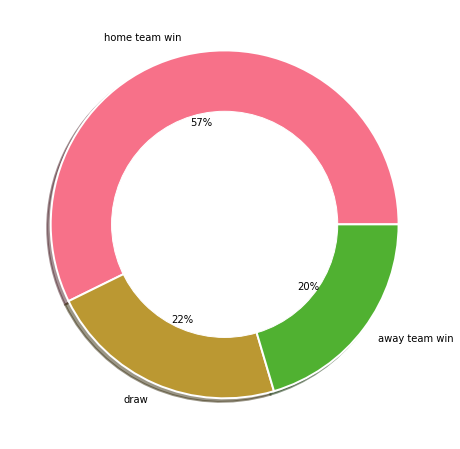

In [42]:
pl.figure(figsize=(10,8))
pltpietotals=matches['Outcome'].value_counts().reset_index()
pltpietotals.columns=['Winners','Counts']
pl.pie(pltpietotals['Counts'],labels=pltpietotals['Winners'],
      autopct="%1.0f%%",
      colors=sns.color_palette('husl'),
      wedgeprops={'linewidth':2,'edgecolor':'white'},
      shadow=True)
circ=pl.Circle((0,0),.65,color='white')
pl.gca().add_artist(circ)
pl.show()

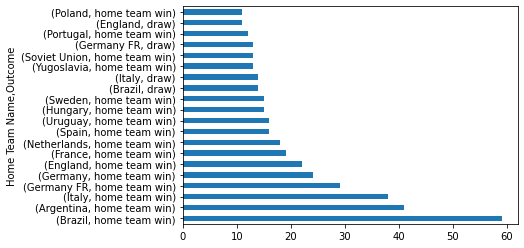

In [43]:
matches.groupby(['Home Team Name','Outcome'])['Outcome'].count().sort_values(ascending=False)[:20].plot.barh()

In [45]:
matches[['Home Team Name','Home Team Goals', 'Away Team Goals', 'Away Team Name',"Outcome"]].head()

Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

         Outcome  
0  home team win  
1  home team win  
2  home team win  
3  home team win  
4  home team win

In [107]:
def win_label(matches):
    if matches['Home Team Goals']>matches['Away Team Goals']:
        return matches['Home Team Name']
    if matches['Home Team Goals']<matches['Away Team Goals']:
        return matches['Away Team Name']
    if matches['Home Team Goals']==matches['Away Team Goals']:
        return 'Draw'
    
    
def lost_label(matches):
    if matches['Home Team Goals']>matches['Away Team Goals']:
        return matches['Away Team Name']
    if matches['Home Team Goals']<matches['Away Team Goals']:
        return matches['Home Team Name']
    if matches['Home Team Goals']==matches['Away Team Goals']:
        return 'Draw'
    
    
matches['win_team']=matches.apply(lambda x:win_label(x),axis=1)
matches['loose_team']=matches.apply(lambda x:lost_label(x),axis=1)
lost=matches['loose_team'].value_counts().reset_index()
win=matches['win_team'].value_counts().reset_index()
tot=win.merge(lost,left_on='index',right_on='index')
draws=tot[tot['index']=='Draw']
tot=tot[tot['index']!='Draw']
tot.columns=['Team','Wins','Loses']


In [109]:
draws

index  win_team  loose_team
0  Draw       190         190

In [93]:
tot=tot.sort_values('Wins',ascending=False)
# tot['draw']=tot[]

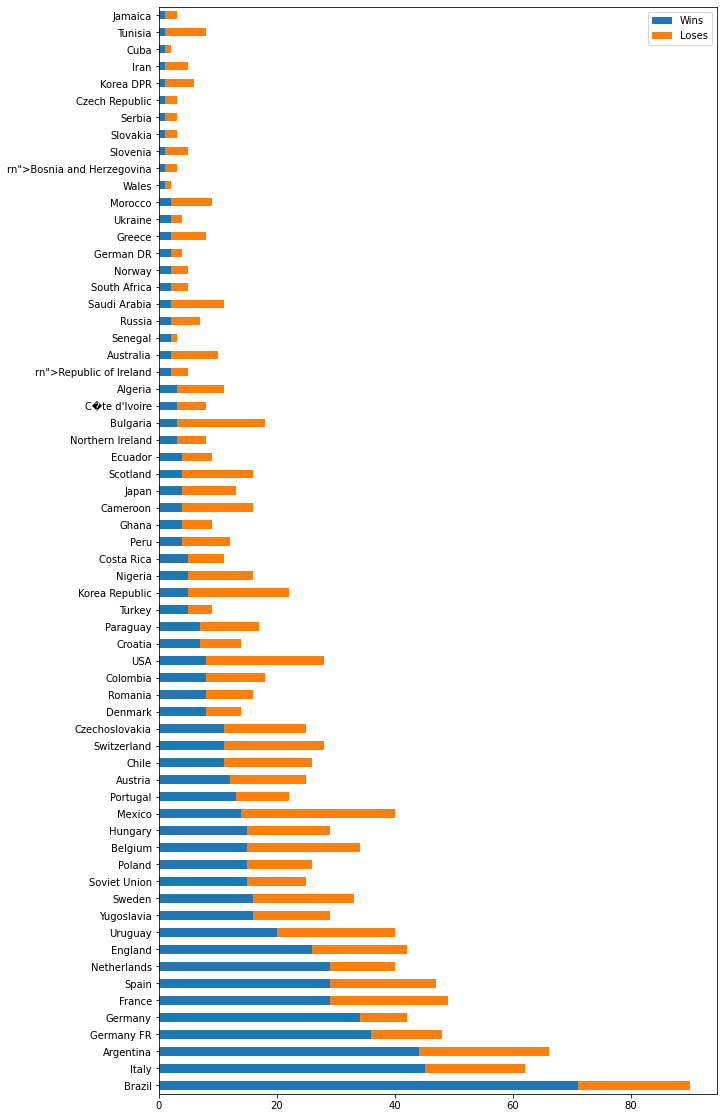

In [94]:
tot.plot.barh(figsize=(10,20),stacked=True)
pl.yticks(range(len(tot)),tot['Team'])
pl.show()

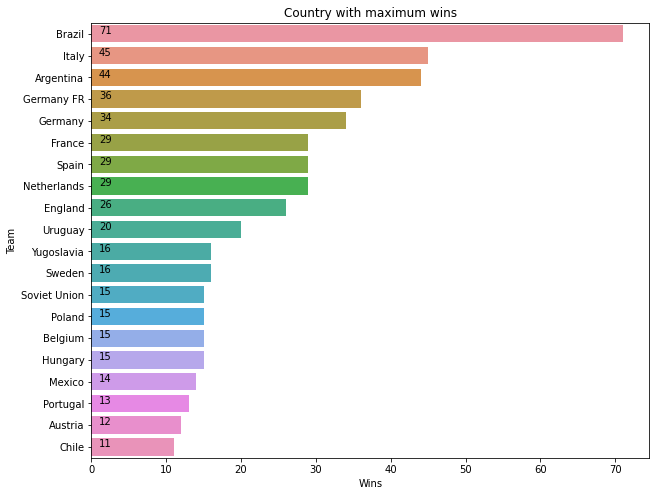

In [102]:
pl.figure(figsize=(10,8))
ax=sns.barplot(tot['Wins'][:20],tot['Team'][:20])
for i,j in enumerate(tot['Wins'][:20]):
    ax.text(1,i,j)
pl.title('Country with maximum wins')
pl.show()

Text(0.5, 1.0, 'Country with maximum loses')

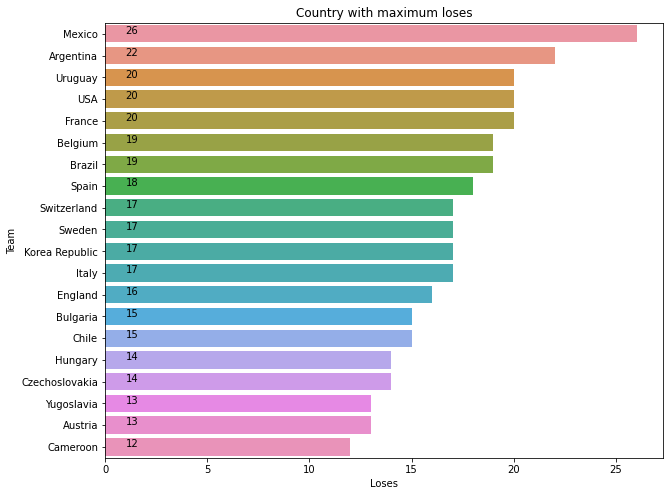

In [103]:
tot=tot.sort_values('Loses',ascending=False)
pl.figure(figsize=(10,8))
ax=sns.barplot(tot['Loses'][:20],tot['Team'][:20])
for i,j in enumerate(tot['Loses'][:20]):
    ax.text(1,i,j)
pl.title('Country with maximum loses')

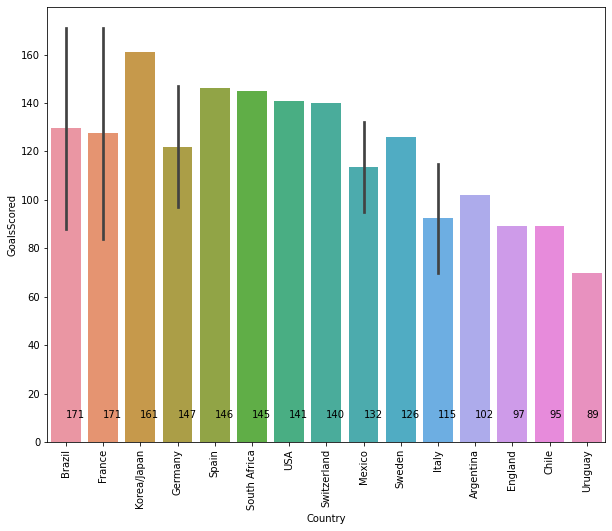

In [124]:
pl.figure(figsize=(10,8))
temp_cups=cups.sort_values('GoalsScored',ascending=False).copy()
ax=sns.barplot(temp_cups['Country'],temp_cups['GoalsScored'])
for i,j in enumerate(temp_cups['GoalsScored'][:15]):
    ax.text(i,10,j)
pl.xticks(rotation=90)
pl.show()

In [227]:
def handleattendance(a):
    b=a.split('.')
    b=''.join(b)
    return int(b)
handleattendance('12323')

12323

In [228]:
cups['Attendance']=cups['Attendance'].apply(lambda x: handleattendance(x))

In [229]:
cups

Year       Country     Winner      Runners-Up        Third  \
0   1930       Uruguay    Uruguay       Argentina          USA   
1   1934         Italy      Italy  Czechoslovakia      Germany   
2   1938        France      Italy         Hungary       Brazil   
3   1950        Brazil    Uruguay          Brazil       Sweden   
4   1954   Switzerland    Germany         Hungary      Austria   
5   1958        Sweden     Brazil          Sweden       France   
6   1962         Chile     Brazil  Czechoslovakia        Chile   
7   1966       England    England         Germany     Portugal   
8   1970        Mexico     Brazil           Italy   Germany FR   
9   1974       Germany    Germany     Netherlands       Poland   
10  1978     Argentina  Argentina     Netherlands       Brazil   
11  1982         Spain      Italy         Germany       Poland   
12  1986        Mexico  Argentina         Germany       France   
13  1990         Italy    Germany       Argentina        Italy   
14  1994           USA     Brazil           Italy       Sweden   
15  1998        France     France          Brazil      Croatia   
16  2002   Korea/Japan     Brazil         Germany       Turkey   
17  2006       Germany      Italy          France      Germany   
18  2010  South Africa      Spain     Netherlands      Germany   
19  2014        Brazil    Germany       Argentina  Netherlands   

            Fourth  GoalsScored  QualifiedTeams  MatchesPlayed  Attendance  
0       Yugoslavia           70              13             18      590549  
1          Austria           70              16             17      363000  
2           Sweden           84              15             18      375700  
3            Spain           88              13             22     1045246  
4          Uruguay          140              16             26      768607  
5       Germany FR          126              16             35      819810  
6       Yugoslavia           89              16             32      893172  
7     Soviet Union           89              16             32     1563135  
8          Uruguay           95              16             32     1603975  
9           Brazil           97              16             38     1865753  
10           Italy          102              16             38     1545791  
11          France          146              24             52     2109723  
12         Belgium          132              24             52     2394031  
13         England          115              24             52     2516215  
14        Bulgaria          141              24             52     3587538  
15     Netherlands          171              32             64     2785100  
16  Korea Republic          161              32             64     2705197  
17        Portugal          147              32             64     3359439  
18         Uruguay          145              32             64     3178856  
19          Brazil          171              32             64     3386810

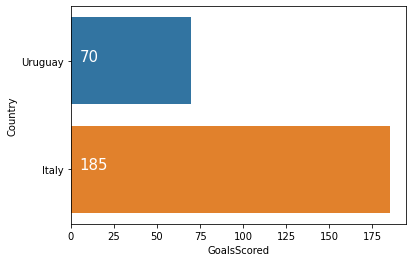

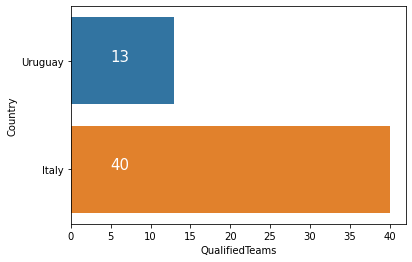

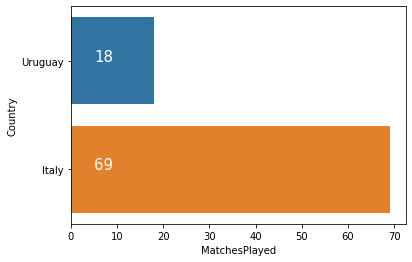

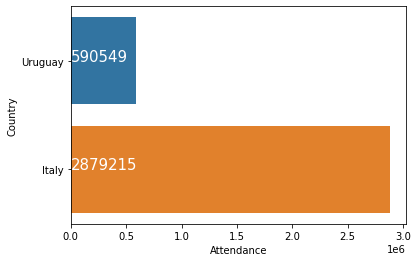

In [243]:
def country_compare(team1,team2):
    t1=cups[cups['Country']==team1]
    t2=cups[cups['Country']==team2]
    cols=['GoalsScored','QualifiedTeams','MatchesPlayed','Attendance']
    for i in cols:
        matches=t1.groupby('Country')[i].sum().reset_index()
        matches2=t2.groupby('Country')[i].sum().reset_index()
        total=pd.concat([matches,matches2])

        ax=sns.barplot(total[i],total['Country'])
        for i,j in enumerate(total[i]):
            ax.text(5,i,j,fontsize=15,c='w')
        pl.show()
country_compare('Uruguay','Italy')

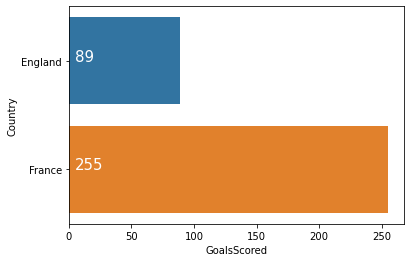

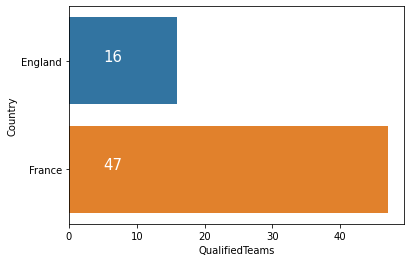

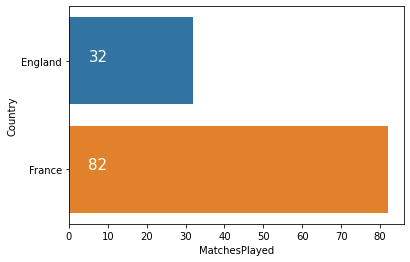

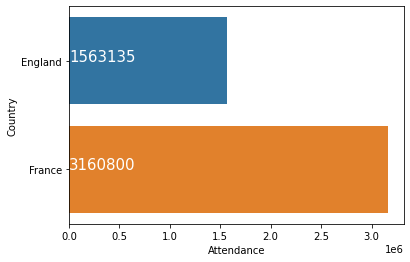

In [245]:
country_compare('England','France')

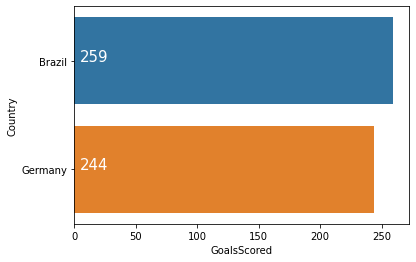

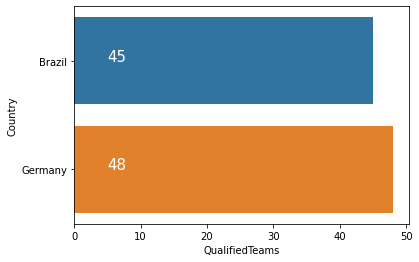

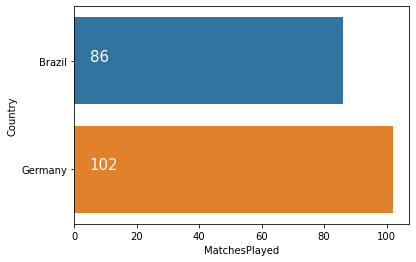

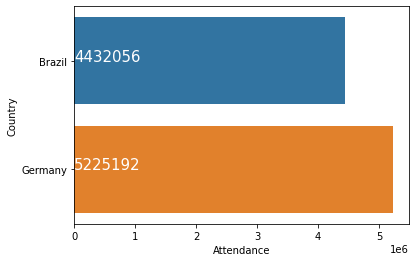

In [246]:
country_compare('Brazil','Germany')

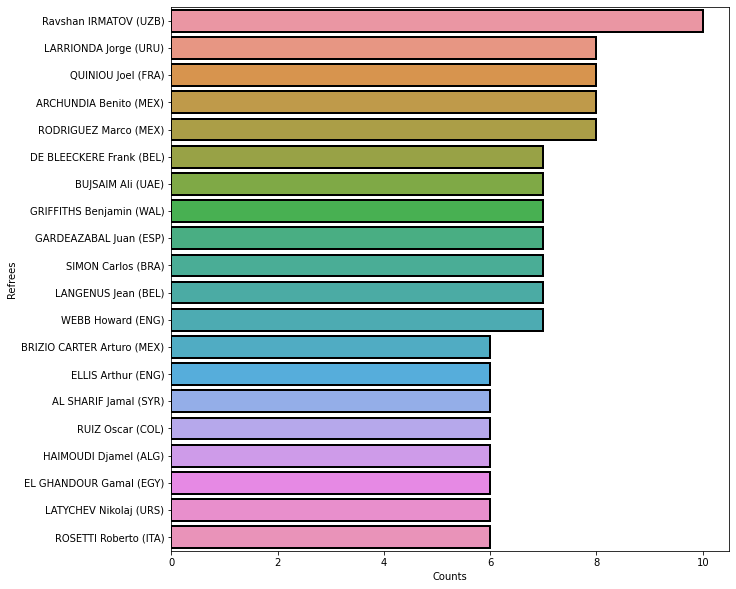

In [268]:
pl.figure(figsize=(10,10))
refrees=matches['Referee'].value_counts().reset_index()
refrees=refrees[:20]
refrees.columns=['Refrees','Counts']
sns.barplot(refrees['Counts'],refrees['Refrees'],edgecolor='k',
           linewidth=2)
pl.show()

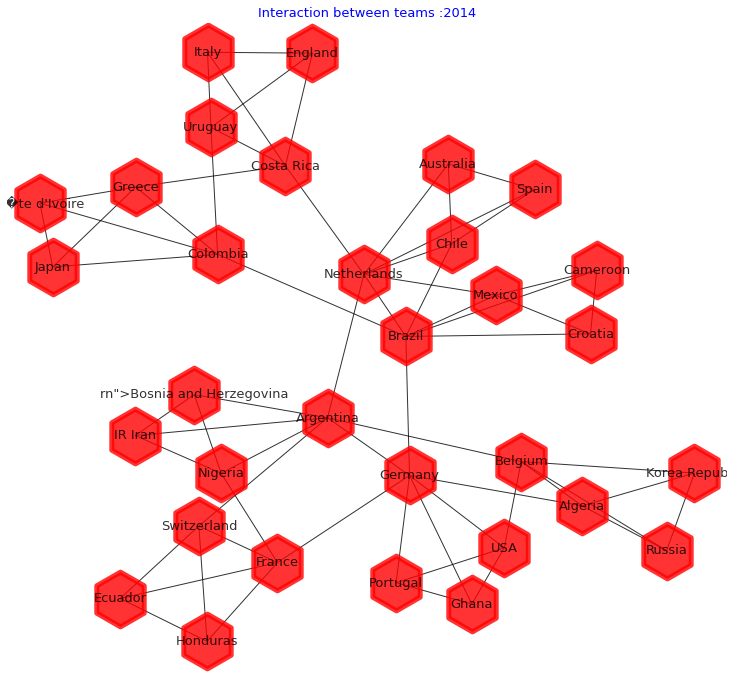

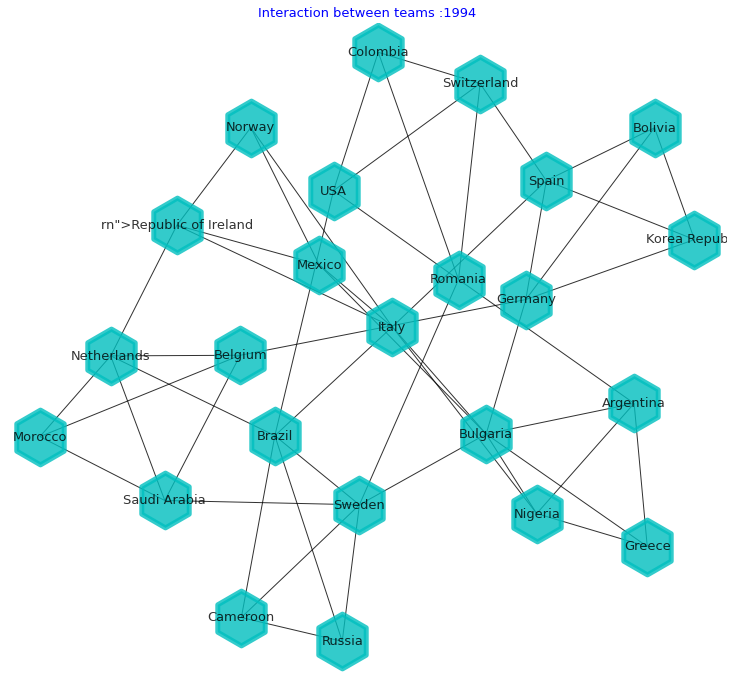

In [294]:
import networkx as nx
def interactions(year,color):
    df=matches[matches['Year']==year][['Home Team Name','Away Team Name']]
    G=nx.from_pandas_edgelist(df,'Home Team Name','Away Team Name')
    pl.figure(figsize=(10,9))
    nx.draw_kamada_kawai(G,with_labels=True,
                        node_size=3000,
                        node_color=color,
                        node_shape='h',
                         edgecolor='k',
                         linewidths=5,
                         font_size=13,
                         alpha=.8,
                        )
    pl.title("Interaction between teams :" + str(year) , fontsize =13 , color = "b")
    
    
    
interactions(2014,'r')
interactions(1994,'c')


In [270]:
matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Second Half home goals', 'Second Half away goals', 'Outcome',
       'win_team', 'loose_team'],
      dtype='object')

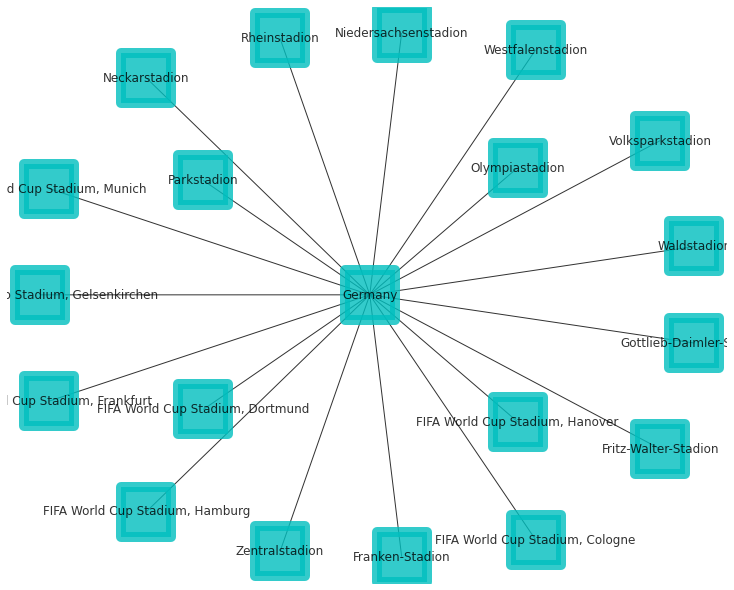

In [358]:
ysc=matches[['Year','Stadium','City','MatchID']]
cy=cups[['Year','Country']]
ysc=ysc.merge(cy,left_on='Year',right_on='Year',how='left')
ysc['Std_city']=ysc['Stadium']+' , '+ysc['City']
def stadium_country(country,color):
    temp=ysc[ysc['Country']==country]
    pl.figure(figsize=(10,8))
    H=nx.from_pandas_edgelist(temp,'Country','Stadium')
    nx.draw_kamada_kawai(H,
                        with_labels=True,
                        node_size=2500,
                        node_color=color,
                         node_shape='s',
                         edgecolor='k',
                         linewidths=10,
                         font_size=12,
                         alpha=0.8
                        )
    
stadium_country('Germany','c')

In [329]:
list(ysc[ysc['Country']=='Uruguay'].groupby('Country')['Std_city']
     

[('Uruguay',
  0                Pocitos , Montevideo 
  1         Parque Central , Montevideo 
  2         Parque Central , Montevideo 
  3                Pocitos , Montevideo 
  4         Parque Central , Montevideo 
  5         Parque Central , Montevideo 
  6         Parque Central , Montevideo 
  7         Parque Central , Montevideo 
  8     Estadio Centenario , Montevideo 
  9     Estadio Centenario , Montevideo 
  10    Estadio Centenario , Montevideo 
  11    Estadio Centenario , Montevideo 
  12    Estadio Centenario , Montevideo 
  13    Estadio Centenario , Montevideo 
  14    Estadio Centenario , Montevideo 
  15    Estadio Centenario , Montevideo 
  16    Estadio Centenario , Montevideo 
  17    Estadio Centenario , Montevideo 
  Name: Std_city, dtype: object)]

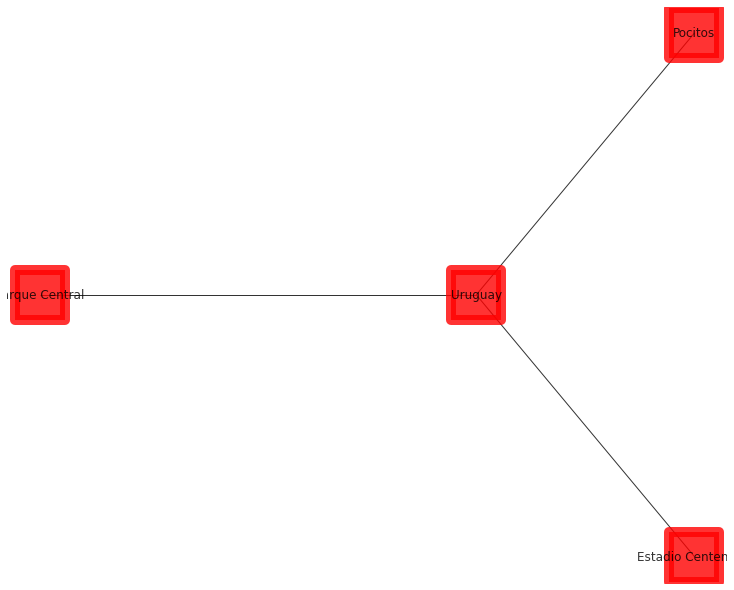

In [356]:
stadium_country('Uruguay','r')

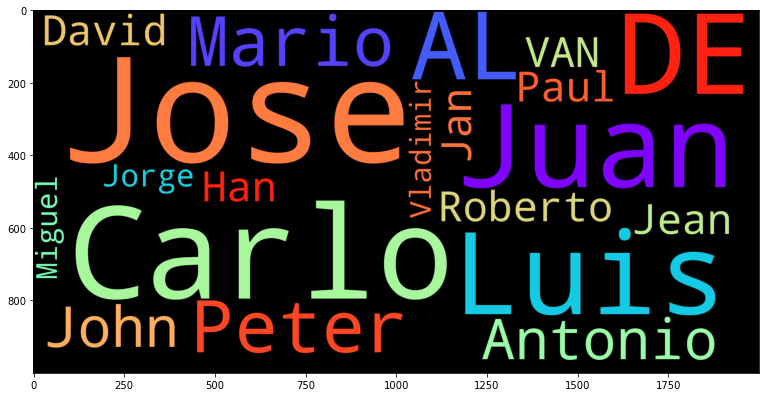

In [375]:
from wordcloud import WordCloud
words=players['Player Name'].value_counts().keys()
wordswc=WordCloud(scale=5,max_words=20,colormap='rainbow').generate(' '.join(words))
pl.figure(figsize=(13,14))
pl.imshow(wordswc)

In [376]:
words=players['Player Name'].value_counts()
words[:20]

RONALDO             33
KLOSE               32
M�LLER              28
OSCAR               28
JULIO CESAR         26
CAFU                26
Sepp MAIER          25
SILVA               25
SCHWEINSTEIGER      25
LAHM                25
MERTESACKER         25
DIDA                25
LEAO                25
PODOLSKI            25
Wladyslaw ZMUDA     24
Giuseppe BERGOMI    23
Dino ZOFF           23
Diego MARADONA      23
PEPE                22
KUYT                22
Name: Player Name, dtype: int64